In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('DEMO_PHQ.csv')
df2 = pd.read_csv('PAG_HEI.csv')

In [2]:
df.isnull().sum()

SEQN          0
DPQ010      498
DPQ020      498
DPQ030      498
DPQ040      498
DPQ050      498
DPQ060      498
DPQ070      498
DPQ080      498
DPQ090      498
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDEDUC       0
INDFMINC     47
dtype: int64

In [3]:
df['INDFMINC'].unique()

array([ 4., 11., 12.,  3.,  1.,  7.,  5., 10.,  8.,  6.,  2.,  9., 13.,
       99., nan, 77.])

In [4]:
#This goes replace all NaN to 9 from tables DPQ010 to DPQ090  [9 = Não sabe (not know)] | 498 values must be affecteds
# Also 47 values INDFMINC Nan to 77 = Se recusou a responder(refused to answer)
df.fillna({"DPQ010": 9, "DPQ020": 9, "DPQ030": 9, "DPQ040": 9, "DPQ050": 9, "DPQ060": 9, "DPQ070": 9, "DPQ080": 9, "DPQ090": 9, "INDFMINC": 77}, inplace=True)

In [5]:
df.isnull().sum()

SEQN        0
DPQ010      0
DPQ020      0
DPQ030      0
DPQ040      0
DPQ050      0
DPQ060      0
DPQ070      0
DPQ080      0
DPQ090      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDEDUC     0
INDFMINC    0
dtype: int64

In [6]:
df_full = pd.merge(df, df2, on="SEQN", how="inner")

In [7]:
df_full[df_full.columns[1:10]] = df_full.iloc[:, 1:10].astype('int')

In [8]:
df_full.DPQ010.nunique()

5

In [9]:
df_full['DPQ010'].unique()

array([9, 0, 1, 2, 3])

In [10]:
#values=[7,9]
#filtered_df = df_full[~df.DPQ010.isin(values)]

In [11]:
#Sum rows from columns DPQ010 to DPQ090 where valeu is <=3 into a new column PHQ9 
df_full['PHQ9'] = df.iloc[:,2:9].where(df <= 3).sum(axis=1) 
#Convert PHQ9 to int
df_full['PHQ9'] = df_full['PHQ9'].astype('int')
df_full

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9
0,31130,9,9,9,9,9,9,9,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,31131,0,0,0,0,0,0,0,0,0,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0
2,31132,0,0,0,0,0,0,0,0,0,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0
3,31134,0,0,0,0,0,0,0,0,0,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0
4,31139,0,0,0,0,3,1,0,0,0,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0,0,1,1,0,0,0,0,0,...,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2
5330,41468,0,2,0,1,1,2,1,3,0,...,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10
5331,41469,1,0,0,1,0,0,0,0,0,...,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,1
5332,41472,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0


In [12]:
#function for classifying depression based on values
def f(row):
    if row['PHQ9'] <5:
        val = 'Sem Sintomas'
    elif row['PHQ9'] < 10:
        val = 'Sintomas Leves'
    elif row['PHQ9'] < 15:
        val = 'Sintomas Moderados'
    elif row['PHQ9'] < 19:
        val = 'Sintomas Moderados Severos'
    else:
        val = 'Sintomas Severos'
    return val

df_full['PHQ_GRP'] = df_full.apply(f, axis=1)

In [13]:
df_full.isnull().sum()

SEQN                          0
DPQ010                        0
DPQ020                        0
DPQ030                        0
DPQ040                        0
DPQ050                        0
DPQ060                        0
DPQ070                        0
DPQ080                        0
DPQ090                        0
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                      0
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
PHQ9    

In [14]:
# Removing NaN for analysis
df_clean = df_full.dropna()
# remove prefix
df_clean.columns = df_clean.columns.str.replace("HEI2015", "")

In [15]:
#df_clean = df_clean.loc[:,"C7_TOTPROT":"PHQ_GRP"]
#df_clean

In [16]:
df_clean.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,C6_TOTALDAIRY,C7_TOTPROT,C8_SEAPLANT_PROT,C9_FATTYACID,C10_SODIUM,C11_REFINEDGRAIN,C12_SFAT,C13_ADDSUG,_TOTAL_SCORE,PHQ9
count,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,...,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000
mean,36365.172727,0.860870,0.865020,1.085178,1.243478,0.871146,0.768577,0.785573,0.712253,0.621739,...,3.756967,4.434237,2.593381,4.706986,4.762261,5.798963,6.067985,6.220367,49.971421,2.249209
std,2967.060374,2.246433,2.231989,2.250048,2.208898,2.237260,2.229295,2.225850,2.239073,2.210954,...,1.605226,1.008311,2.171836,3.237059,3.420252,3.496261,3.178186,3.330305,12.324533,3.145756
min,31131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212,0.000000
25%,33839.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.591999,4.171156,0.000000,2.023710,1.587909,2.925413,3.697080,3.724867,41.032289,0.000000
50%,36364.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.940948,5.000000,2.588240,4.430397,4.833553,6.234319,6.414811,6.864138,49.512445,1.000000
75%,38919.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.000000,5.000000,7.270784,7.650807,9.253265,8.997076,9.454234,58.168013,3.000000
max,41473.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383,21.000000


Text(0.5, 1.0, 'Gender')

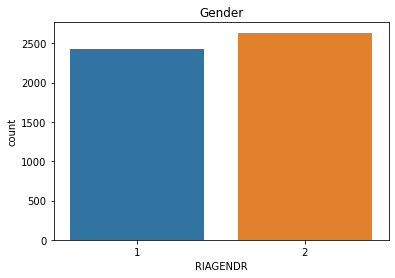

In [17]:
#Gender 1 = Men & 2 = Women
#df_clean = df_clean.replace({'RIAGENDR': {1: 'Male', 2: 'Female'}})
sns.countplot(data=df_clean, x='RIAGENDR')
plt.title("Gender")

Text(0.5, 1.0, 'Age')

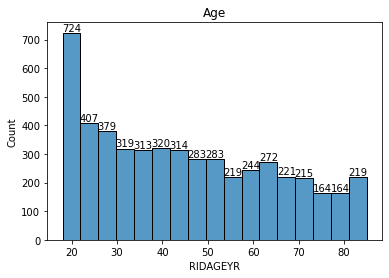

In [21]:
age = sns.histplot(data=df_clean, x='RIDAGEYR')
age.bar_label(age.containers[0])
plt.title("Age")

Text(0.5, 1.0, 'Depression Levels')

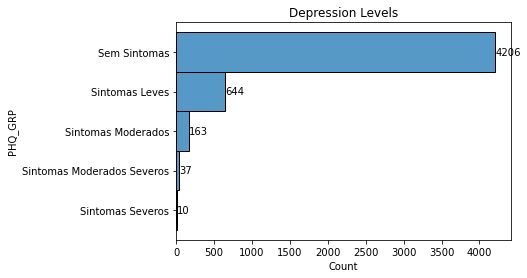

In [22]:
# Show values on bars = level.bar_label(level.containers[0])
level = sns.histplot(data=df_clean, y='PHQ_GRP')
level.bar_label(level.containers[0])
plt.title("Depression Levels")

In [ ]:
#Plot everything
#sns.pairplot(df_clean) 

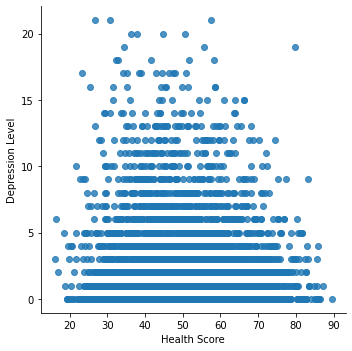

In [48]:
#df_dp = df_clean[df_clean['PHQ9'] >= 5]
sns.lmplot(data = df_clean, x = '_TOTAL_SCORE', y = 'PHQ9', fit_reg = False)
plt.xlabel('Health Score')
plt.ylabel('Depression Level')
plt.show()

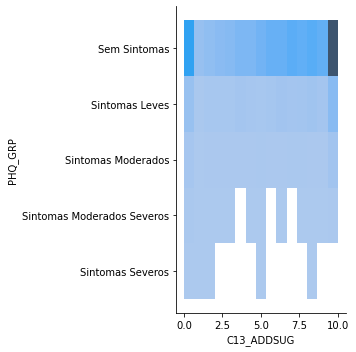

In [23]:
sns.displot(df_clean, x="C13_ADDSUG", y="PHQ_GRP")

Text(0.5, 1.0, 'Education x Depression Levels')

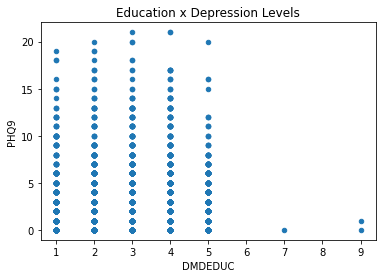

In [24]:
df_clean.plot.scatter(x="DMDEDUC", y="PHQ9")
plt.title("Education x Depression Levels")

<AxesSubplot:>

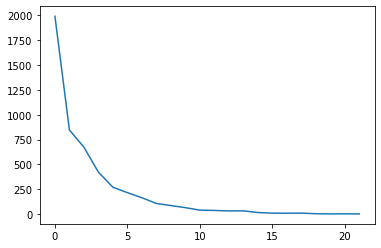

In [25]:
df_clean['PHQ9'].value_counts().sort_index().plot.line()

In [ ]:
sns.histplot(x="RIAGENDR", y="PHQ9", data=df_clean)

In [ ]:
sns.histplot(x="RIDRETH1", y="PHQ9", data=df_clean)

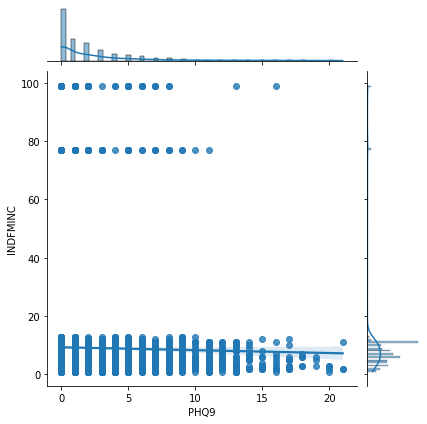

In [26]:
sns.jointplot(x="PHQ9", y="INDFMINC", data=df_clean, kind='reg')

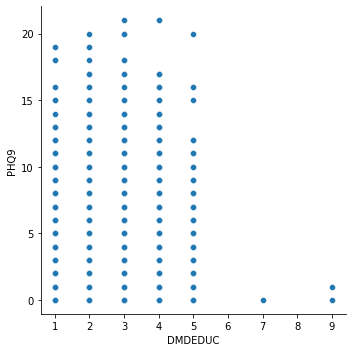

In [27]:
sns.relplot(x="DMDEDUC", y="PHQ9", data=df_clean)

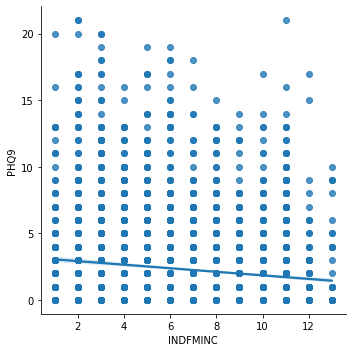

In [50]:
df_renda = df_clean[df_clean['INDFMINC'] <= 13]
sns.lmplot(data=df_renda, x="INDFMINC", y="PHQ9")

In [ ]:
sns.displot